In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd

In [2]:
youtube = pd.read_csv("USvideos.csv")

In [3]:
youtube = youtube[youtube['category_id']==26]

In [4]:
youtube = youtube[['title','trending_date','publish_time','tags','views','likes','dislikes','comment_count']]
youtube.head(50)
youtube =youtube.dropna()
youtube.head()


,title,trending_date,publish_time,tags,views,likes,dislikes,comment_count
23,"What $4,800 Will Get You In NYC | Sweet Digs H...",17.14.11,2017-11-12T16:00:01.000Z,"refinery29|""refinery 29""|""r29""|""r29 video""|""vi...",145921,1707,578,673
27,A Smart... MUG?! - Take apart a Heated Thermos!,17.14.11,2017-11-13T16:00:03.000Z,"Smart mug|""Heated thermos""|""tech""|""gift idea""|...",120727,9033,224,1346
45,iPhone X vs Makeup Transformation (Face ID TEST),17.14.11,2017-11-12T00:45:54.000Z,"iphone x|""iphonex makeup""|""iphonex test""|""new ...",1456472,33505,1660,2160
69,John Lewis Christmas Ad 2017 - #MozTheMonster,17.14.11,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479
80,A VERY #EXTRA EBAY SHOPPING HAUL!,17.14.11,2017-11-11T02:42:23.000Z,"ebay|""haul""|""cheap""|""challenge""|""extra""|""amber...",484185,23296,1184,1858


In [5]:
youtube.describe()

,views,likes,dislikes,comment_count
count,4.146000e+03,4146.000000,4146.000000,4146.000000
mean,9.837301e+05,39286.076942,1320.284370,5583.586589
std,1.928995e+06,53860.958669,2847.194161,15848.022029
min,1.107000e+03,0.000000,0.000000,0.000000
25%,2.154222e+05,7655.250000,199.000000,731.750000
50%,5.027830e+05,21492.500000,502.500000,1842.000000
75%,1.098036e+06,48313.750000,1292.500000,4813.750000
max,5.415592e+07,605954.000000,66632.000000,203884.000000


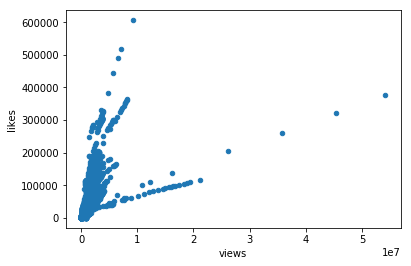

In [12]:
d = {"views" : youtube['views'],"likes" : youtube['likes']}
vl = pd.DataFrame(data=d)
#views = youtube['views']
#likes = youtube['likes']
#print(views.shape)
youtube.plot.scatter(x='views',y='likes')

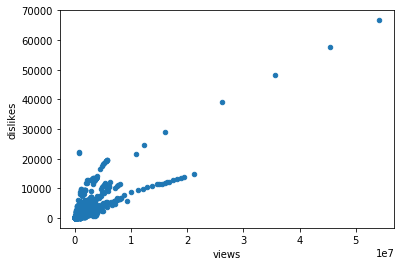

In [13]:
d = {"views" : youtube['views'],"dislikes" : youtube['dislikes']}
vl = pd.DataFrame(data=d)
youtube.plot.scatter(x='views',y='dislikes')

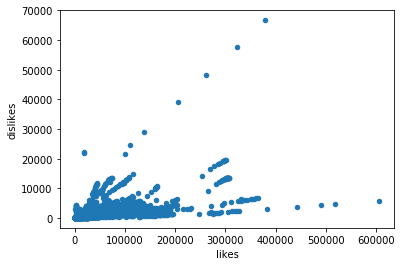

In [14]:
d = {"likes" : youtube['likes'],"dislikes" : youtube['dislikes']}
vl = pd.DataFrame(data=d)
youtube.plot.scatter(x='likes',y='dislikes')

In [117]:
tags = youtube['tags']
tags_new = list(tags)
new_tags = []
count_tags = []

for s in tags_new:
    s = s.split('|')
    new_tags.append(s)

for i in new_tags:
    count_tags.append(len(i))

count_tag = np.array(count_tags, dtype=np.int64)
print(type(count_tag[0]))
count_tag= pd.Series(count_tag)
count_tag.astype('int64')


youtube['count_tags']=count_tag

test = youtube['likes']
print(test.iloc[1])
print(count_tag.iloc[1])


youtube.head()


<class 'numpy.int64'>
9033
18


,title,trending_date,publish_time,tags,views,likes,dislikes,comment_count,count_tags
23,"What $4,800 Will Get You In NYC | Sweet Digs H...",17.14.11,2017-11-12T16:00:01.000Z,"refinery29|""refinery 29""|""r29""|""r29 video""|""vi...",145921,1707,578,673,35.0
27,A Smart... MUG?! - Take apart a Heated Thermos!,17.14.11,2017-11-13T16:00:03.000Z,"Smart mug|""Heated thermos""|""tech""|""gift idea""|...",120727,9033,224,1346,12.0
45,iPhone X vs Makeup Transformation (Face ID TEST),17.14.11,2017-11-12T00:45:54.000Z,"iphone x|""iphonex makeup""|""iphonex test""|""new ...",1456472,33505,1660,2160,9.0
69,John Lewis Christmas Ad 2017 - #MozTheMonster,17.14.11,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,40.0
80,A VERY #EXTRA EBAY SHOPPING HAUL!,17.14.11,2017-11-11T02:42:23.000Z,"ebay|""haul""|""cheap""|""challenge""|""extra""|""amber...",484185,23296,1184,1858,35.0


In [94]:
d = {"tags": youtube['count_tags'],"views" : youtube['views']}
vl = pd.DataFrame(data=d)
youtube.plot.scatter(x='tags',y='views')

ValueError: scatter requires x column to be numeric